In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../Data/ttc_subway_delay_2018_2019_for_machine_learning.csv')
df.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
0,7601,2018-02-13,6:57,Tuesday,BROADVIEW STATION,EUNT,2,4,W,BD,5285,Equipment - No Trouble Found,43.676944,-79.358333,Bloor Danforth,February,5-9AM,2,6,2018
1,3102,2019-06-12,11:54,Wednesday,COXWELL STATION,TUNIP,2,5,W,BD,5350,Operator Not In Position,43.684167,-79.323056,Bloor Danforth,June,9AM-12PM,6,11,2019
2,10917,2018-07-31,17:05,Tuesday,COXWELL STATION,TUNOA,2,4,E,BD,0,No Operator Immediately Available,43.684167,-79.323056,Bloor Danforth,July,3-6PM,7,17,2018
3,10918,2018-07-31,17:33,Tuesday,COXWELL STATION,TUNOA,2,4,E,BD,0,No Operator Immediately Available,43.684167,-79.323056,Bloor Danforth,July,3-6PM,7,17,2018
4,10919,2018-07-31,17:40,Tuesday,COXWELL STATION,TUNOA,2,4,W,BD,0,No Operator Immediately Available,43.684167,-79.323056,Bloor Danforth,July,3-6PM,7,17,2018


In [4]:
df.columns

Index(['id', 'date', 'time', 'day', 'station', 'code', 'min_delay', 'min_gap',
       'bound', 'line', 'vehicle', 'code_info', 'latitude', 'longitude',
       'line_name', 'month', 'time_range', 'month_number', 'hour', 'year'],
      dtype='object')

In [14]:
df = df.loc[df["station"]=="SHEPPARD WEST STATION"]
df.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
3004,81,2019-01-05,14:39,Saturday,SHEPPARD WEST STATION,TUNIP,3,6,N,YU,5551,Operator Not In Position,43.749444,-79.461944,Yonge University Spadina,January,12-3PM,1,14,2019
3005,99,2019-01-07,11:51,Monday,SHEPPARD WEST STATION,TUNIP,3,6,N,YU,5931,Operator Not In Position,43.749444,-79.461944,Yonge University Spadina,January,9AM-12PM,1,11,2019
3006,104,2019-01-07,16:42,Monday,SHEPPARD WEST STATION,MUI,3,5,S,YU,5516,Injured or ill Customer (On Train) - Transported,43.749444,-79.461944,Yonge University Spadina,January,3-6PM,1,16,2019
3007,177,2019-01-11,12:28,Friday,SHEPPARD WEST STATION,EUNT,3,6,S,YU,6076,Equipment - No Trouble Found,43.749444,-79.461944,Yonge University Spadina,January,12-3PM,1,12,2019
3008,309,2019-01-18,16:44,Friday,SHEPPARD WEST STATION,TUNIP,3,5,S,YU,5546,Operator Not In Position,43.749444,-79.461944,Yonge University Spadina,January,3-6PM,1,16,2019


In [38]:
#df_selected = df[["station","bound","line","month_number","hour","year"]]
#df_selected = df[["station","bound","day","hour"]]
#df_selected = df[["station","bound","month_number","hour","year","day_number"]]
#df_selected = df[["station","month_number","hour"]]
df_selected = df[["day","month_number","hour"]]
df_selected.head()

,day,month_number,hour
3004,Saturday,1,14
3005,Monday,1,11
3006,Monday,1,16
3007,Friday,1,12
3008,Friday,1,16


In [39]:
# Assign the data to X and y

X_NoEncoded = df_selected
y = df["min_delay"].values.reshape(-1, 1)
print(X_NoEncoded.shape, y.shape)

(649, 3) (649, 1)


GET DUMMIES ALL

In [40]:
X = pd.get_dummies(X_NoEncoded)
X.head()

,month_number,hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
3004,1,14,0,0,1,0,0,0,0
3005,1,11,0,1,0,0,0,0,0
3006,1,16,0,1,0,0,0,0,0
3007,1,12,1,0,0,0,0,0,0
3008,1,16,1,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, y_train.shape)

(486, 9) (486, 1)


StandardScaler

In [42]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [43]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [44]:
#--> FOR SCALED!!

# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.026217712491678036
Testing Score: -0.013829815791006617


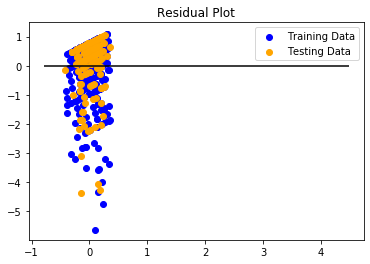

In [45]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION